# 🚀 GST Analytics Hackathon Project

Welcome to my project submission for the **GST Analytics Hackathon**! This project aims to develop an innovative predictive model that can accurately classify entities within the GST system. Leveraging cutting-edge techniques in machine learning, this project addresses a complex binary classification problem using a large dataset provided by the GST Analytics team.

## 📁 Project Overview

- **Objective**: To create a supervised learning model that predicts whether a specific entity is classified as "0" or "1" based on various features.
- **Dataset**: The dataset contains 9 lakh records with 23 attributes, spread over training and testing sets.
- **Methodology**: The project involves data preprocessing, feature engineering, model training, and evaluation using various performance metrics.
- **Tools & Technologies**: Python, scikit-learn, XGBoost, Pandas, Optuna and more.

## 🔍 Key Evaluation Metrics

- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**
- **AUC-ROC Curve**
- **Confusion Matrix**

## 🌟 Why This Project?

This project not only showcases my technical skills in data science but also contributes to the development of solutions that can enhance the efficiency of the GST system in India.

Let's dive in! 💡


## Importing libraries, data and getting started

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.express as px
import kaleido
import plotly.io as pio
pio.renderers.default = "png"
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from collections import Counter

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

seed = 0
np.random.seed(0)

In [45]:
xtrain = pd.read_csv('data/X_Train_Data_Input.csv')
xtest  = pd.read_csv('data/X_Test_Data_Input.csv')
ytrain = pd.read_csv('data/Y_Train_Data_Target.csv')
ytest  = pd.read_csv('data/Y_Test_Data_Target.csv')

## EDA For X Train

In [49]:
xtrain_id = xtrain['ID'] # Storing ID for later use
ytrain_id = ytrain['ID'] # Storing ID for later use
xtest_id = xtest['ID'] # Storing ID for later use
ytest_id = ytest['ID'] # Storing ID for later use

xtrain.drop(columns = ['ID'], inplace=True) # Dropping ID column for EDA + Modelling purpose
ytrain.drop(columns = ['ID'], inplace=True) # Dropping ID column for EDA + Modelling purpose
xtest.drop(columns = ['ID'], inplace=True) # Dropping ID column for EDA + Modelling purpose
ytest.drop(columns = ['ID'], inplace=True) # Dropping ID column for EDA + Modelling purpose


In [50]:
xtrain.head(10).T

,0,1,2,3,4,5,6,7,8,9
Column0,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
Column1,2495.000000,2495.000000,2495.000000,211.000000,718.000000,886.000000,2495.000000,2495.000000,657.000000,647.000000
Column2,3726.000000,3454.000000,4543.000000,59.000000,950.000000,2842.000000,2612.000000,3053.000000,137.000000,1678.000000
Column3,0.678139,0.452580,-1.577453,NaN,-2.028572,-1.126335,-2.028572,0.678139,-0.404545,-2.028572
Column4,0.701403,0.701403,-1.429540,NaN,-1.855728,-1.216445,-1.855728,0.701403,-0.321449,-1.571603
Column5,-0.007468,-0.007468,-0.007469,NaN,NaN,-0.007469,-0.007468,-0.007468,-0.007467,-0.007469
Column6,0.434190,1.554998,-0.407939,-0.407939,-0.407939,-0.407939,-0.402851,-0.094001,-0.407939,-0.407939
Column7,-0.015603,-0.015574,-0.015607,-0.015607,-0.015607,-0.015607,-0.015607,-0.015605,-0.015607,-0.015607
Column8,0.606265,0.329946,-0.774979,-0.774979,-0.774979,-0.774979,0.673163,0.136592,0.634026,-0.774979
Column9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
round(xtrain.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Column0,785124.0,0.44,1.16,0.00,0.00,0.00,0.00,18.00
Column1,785133.0,1321.79,907.27,-1080.00,515.00,1173.00,2435.00,2499.00
Column2,785133.0,2951.28,2143.14,-47.00,1129.00,2709.00,4472.00,10290.00
Column3,658830.0,-0.00,1.00,-2.03,-0.68,0.68,0.68,0.68
Column4,657423.0,-0.00,1.00,-1.86,-0.58,0.70,0.70,0.70
Column5,617953.0,-0.00,1.02,-0.01,-0.01,-0.01,-0.01,551.42
Column6,781283.0,-0.00,1.00,-0.41,-0.41,-0.41,-0.37,14.99
Column7,785133.0,0.00,1.05,-0.02,-0.02,-0.02,-0.02,201.69
Column8,781283.0,-0.00,1.06,-0.77,-0.77,0.12,0.63,323.99
Column9,52996.0,0.01,1.11,-0.09,-0.09,-0.08,-0.06,133.91


In [61]:
info_xtrain = pd.DataFrame({
    'Num of unique values': xtrain.nunique(),   # Number of unique vales in each column
    'Standard Deviation': round(xtrain.std(), 2), # Standard deviation of each column
    'Varience': round(xtrain.var(), 2), # Variance of each column
    '% of Null values': round(xtrain.isna().mean() * 100, 2),  # Percentage NaN for each column
    '% of unique populated values': round(xtrain.nunique()/(xtrain.shape[0]-xtrain.isna().sum()) * 100) # Percentage oof unique populated values for each column
})
info_xtrain

,Num of unique values,Standard Deviation,Varience,% of Null values,% of unique populated values
Column0,19,1.16,1.35,0.00,0.0
Column1,2564,907.27,823135.16,0.00,0.0
Column2,9424,2143.14,4593049.66,0.00,1.0
Column3,47,1.00,1.00,16.09,0.0
Column4,47,1.00,1.00,16.27,0.0
Column5,148334,1.02,1.03,21.29,24.0
Column6,157264,1.00,1.00,0.49,20.0
Column7,166513,1.05,1.09,0.00,21.0
Column8,355728,1.06,1.12,0.49,46.0
Column9,49650,1.11,1.23,93.25,94.0


In [55]:
traces = {
    'marker_line_width': 1,
     'marker_line_color': 'black'
} # Parameters for visualizations

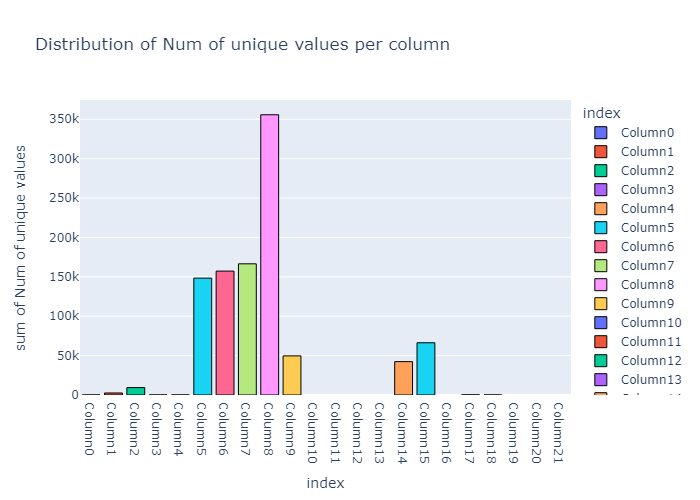

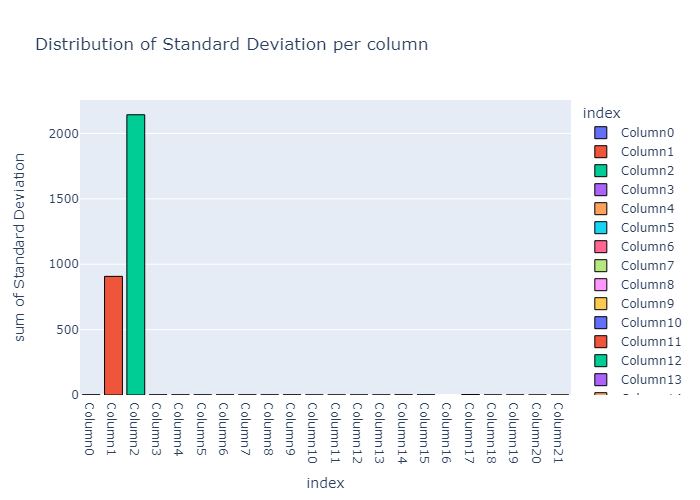

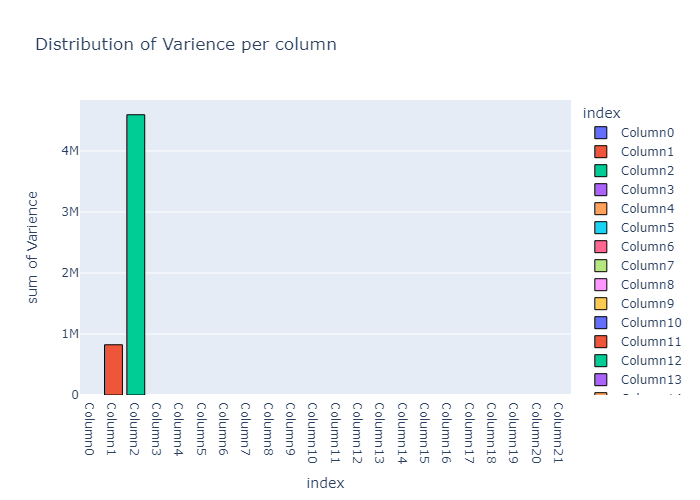

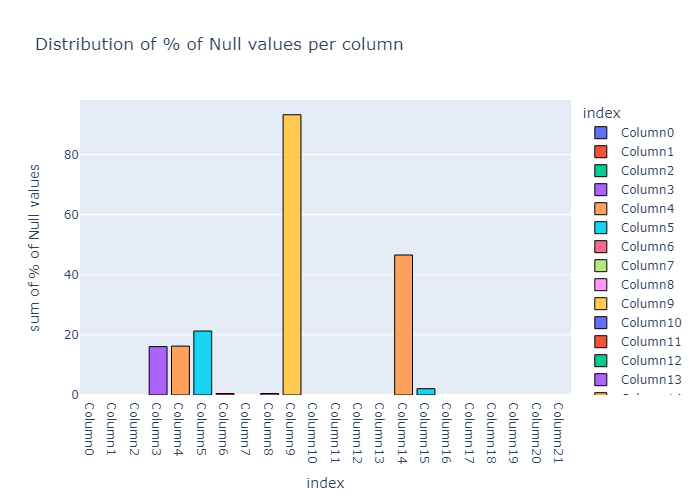

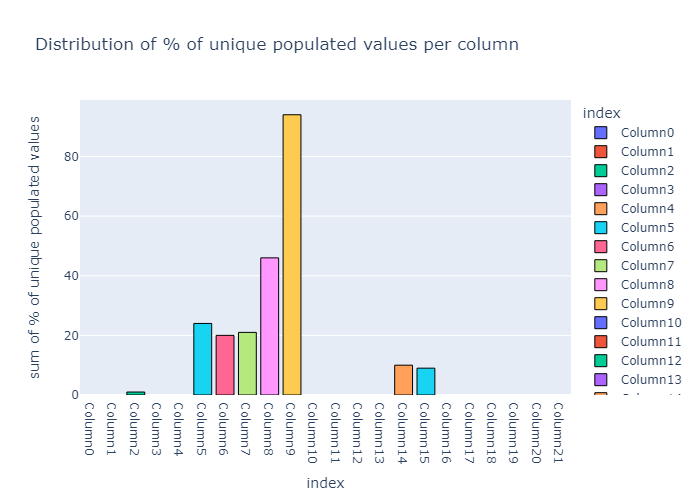

In [63]:
for col in info_xtrain.columns:
    fig = px.histogram(data_frame=info_xtrain, 
                       y = info_xtrain[col], 
                       x = info_xtrain.index,
                       color = info_xtrain.index,
                       title = f'Distribution of {col} per column')
    fig.update_traces(**traces)
    fig.show()

Based on the unique counts and the descriptive analytics of the features, we can infer that: <br><br>
=> Features with low percentage of unique values would be categorical features, and conversly, columns with a higher percentage of unique values would be numeric features.
- Columns `5 - 8` seem to be _numeric features_.
- Columns `0 - 4, and 10-21` seem to be encoded _categorical features_. 
- Column `9` has a large amount of NaN values, so it is difficult to infer what it might have been, but: 
    - ~94% of populated values are unique.
    - It might be safe to assume that _Column 9 is a numeric feature_.

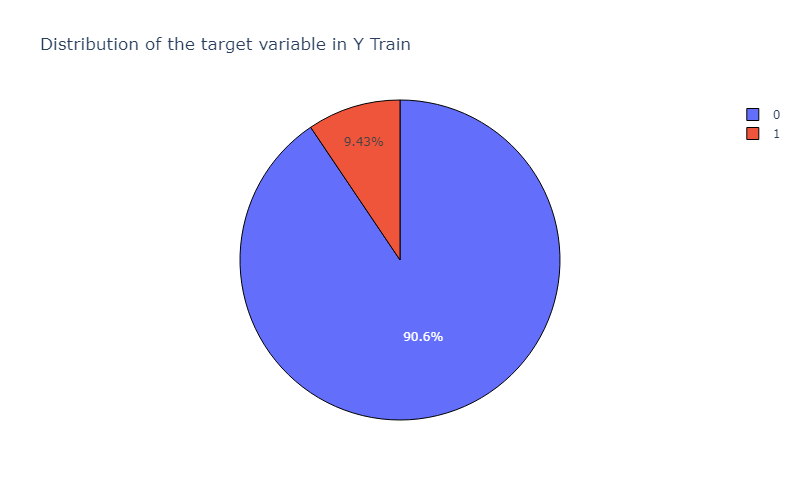

Values in the target variable => 0: 711100, 1: 74033


In [41]:
fig = px.pie(data_frame = ytrain['target'], 
                   names = ytrain['target'], 
                   height = 500, 
                   width = 800, 
                   color = ytrain['target'],
                   title = 'Distribution of the target variable in Y Train')
fig.update_traces(marker_line_width = 1, marker_line_color = 'black')
fig.show()

print(f'Values in the target variable => 0: {Counter(ytrain['target'])[0]}, 1: {Counter(ytrain['target'])[1]}')

### Visualizations for all columns in X Train

In [19]:
num_cols = ['Column5', 'Column6', 'Column7', 'Column8', 'Column9']
cat_cols = ['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column10', 'Column11', 'Column12', 'Column13', 
            'Column14', 'Column15', 'Column16', 'Column17', 'Column18', 'Column19', 'Column20', 'Column21']

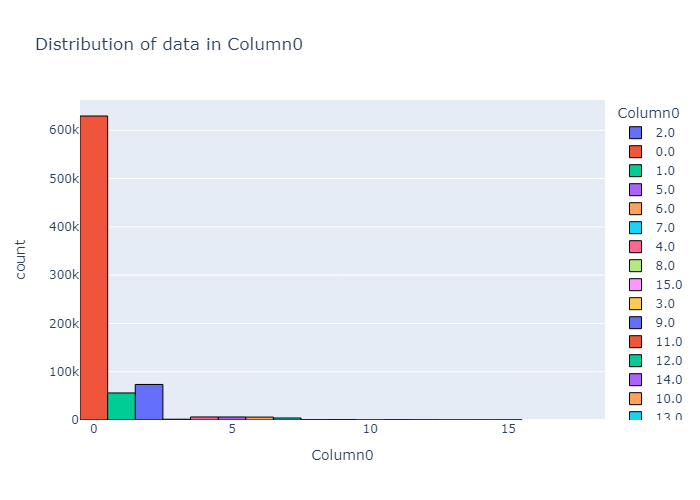

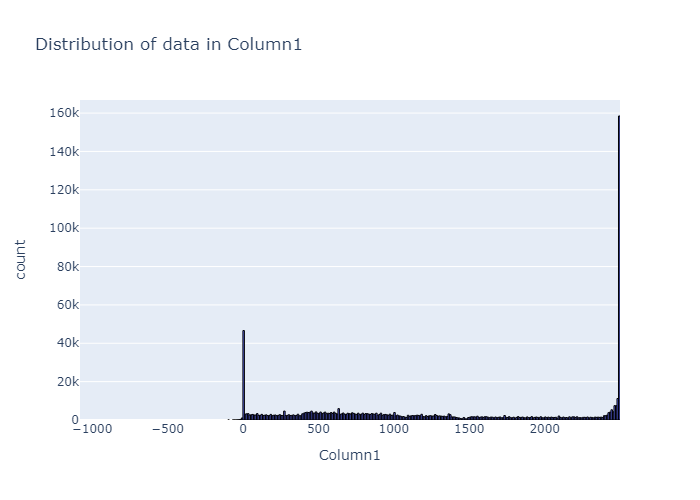

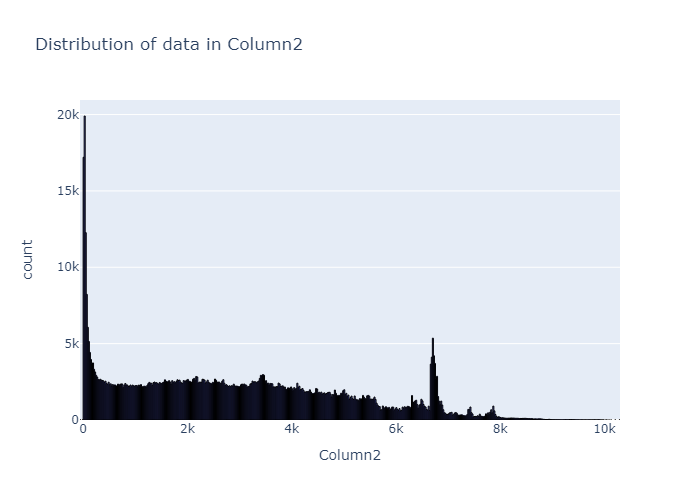

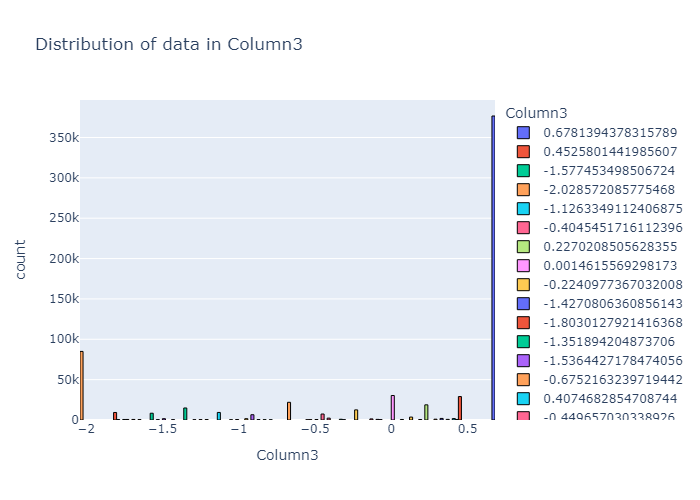

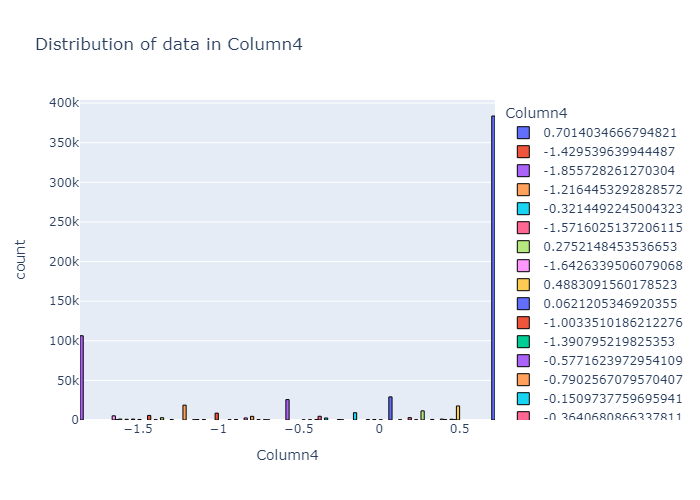

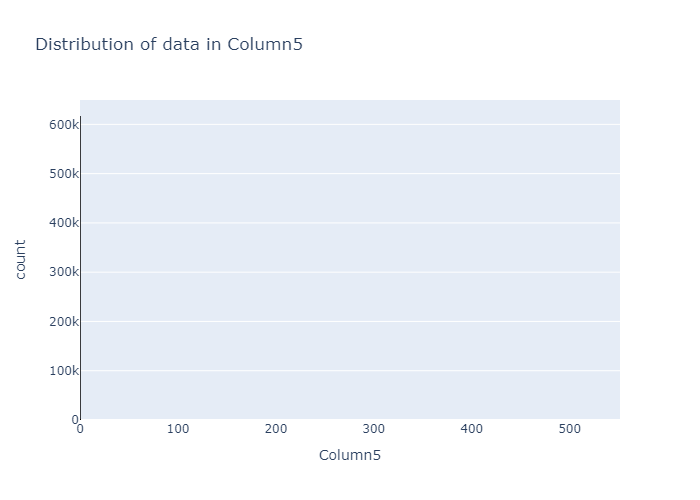

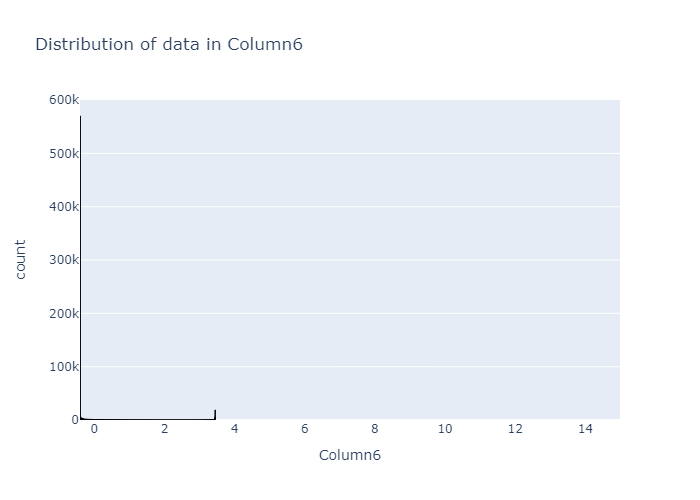

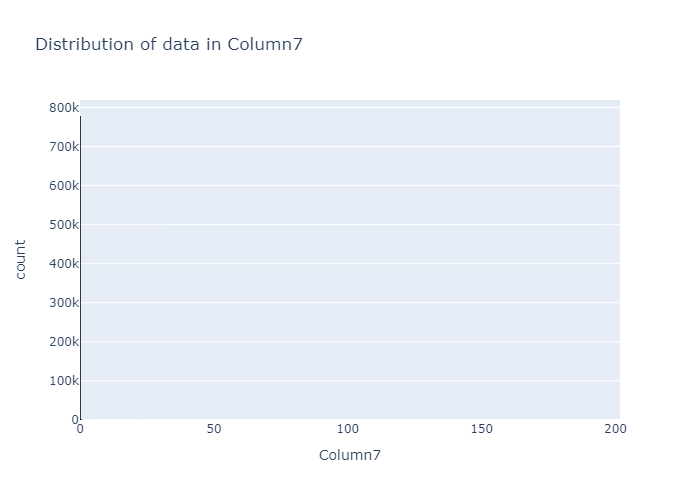

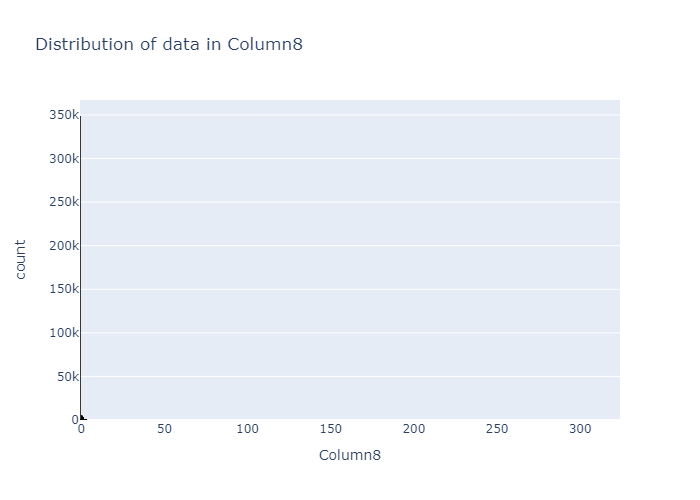

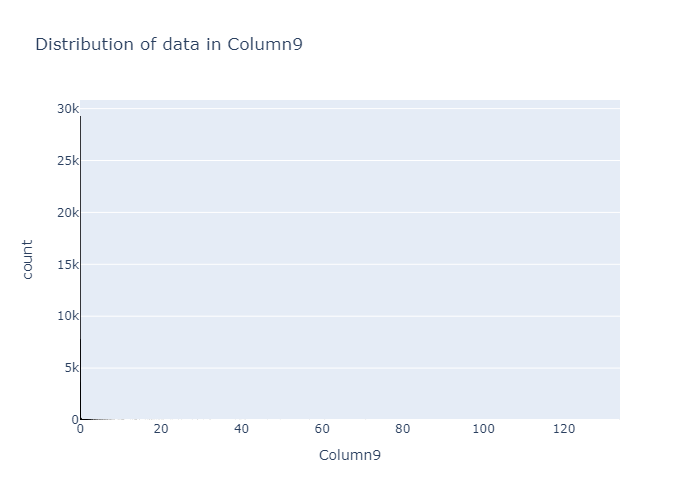

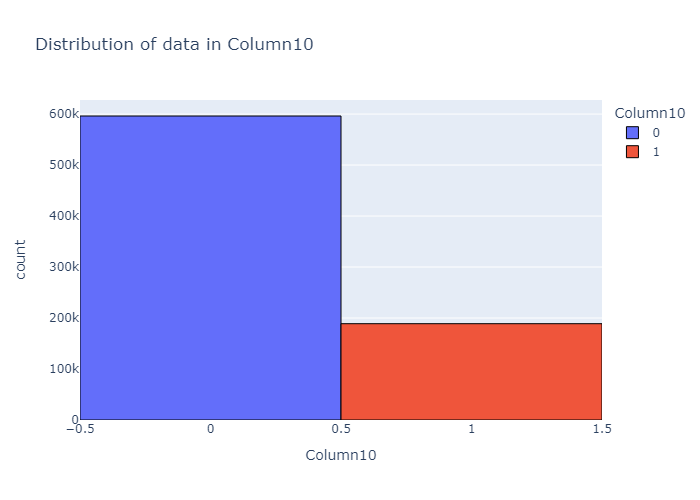

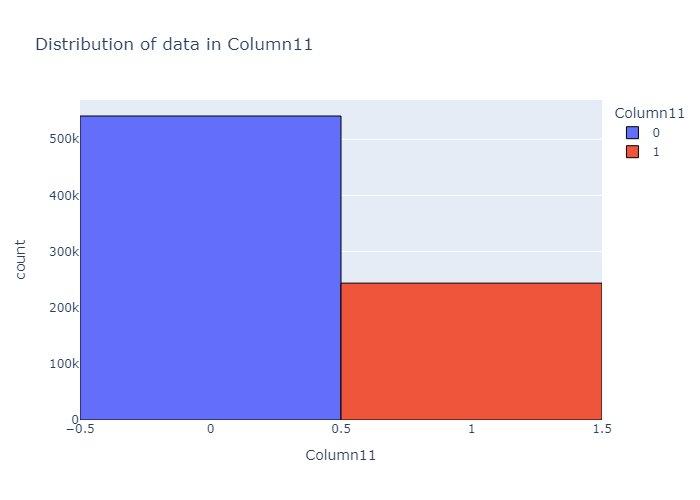

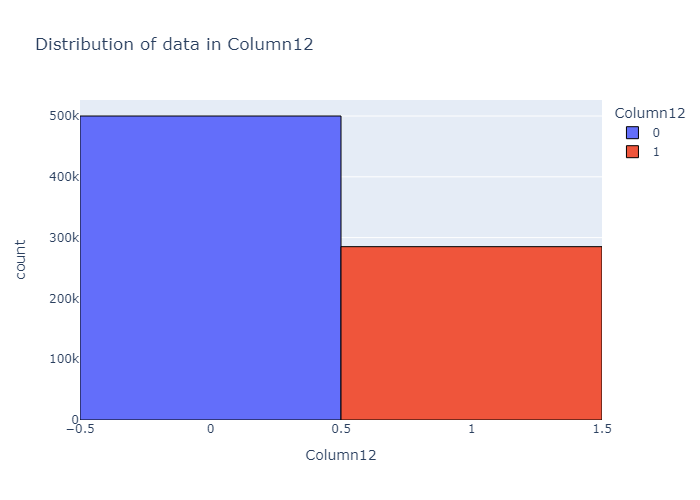

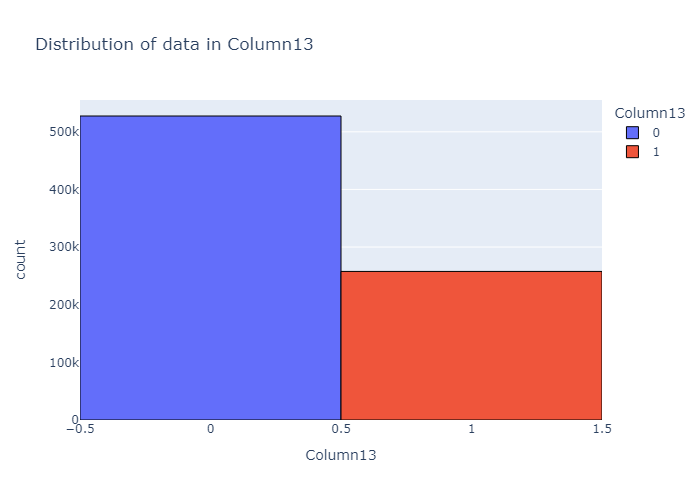

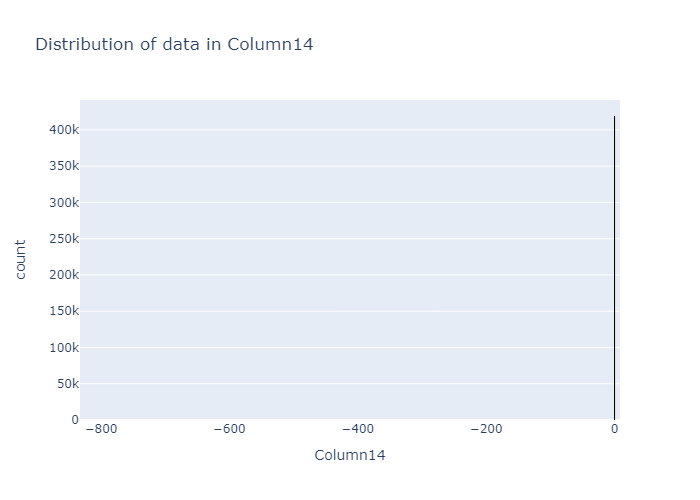

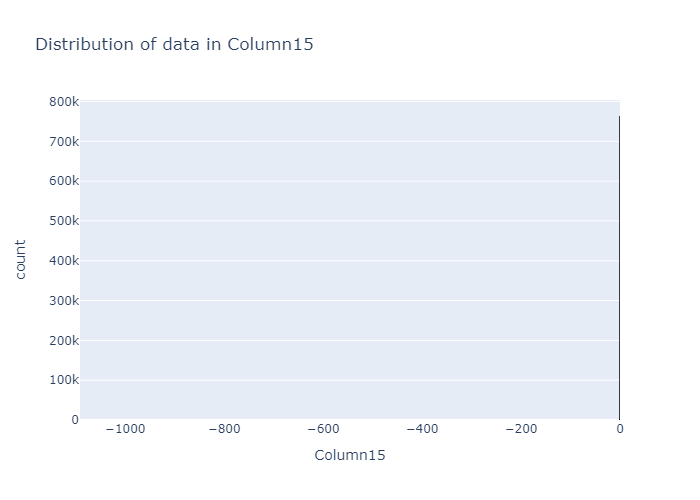

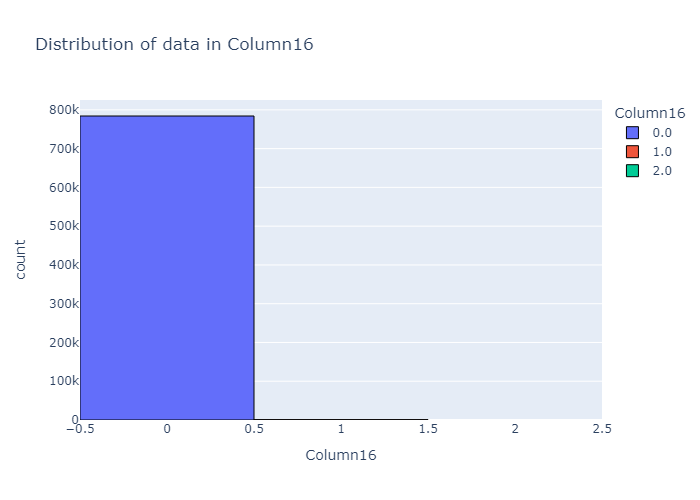

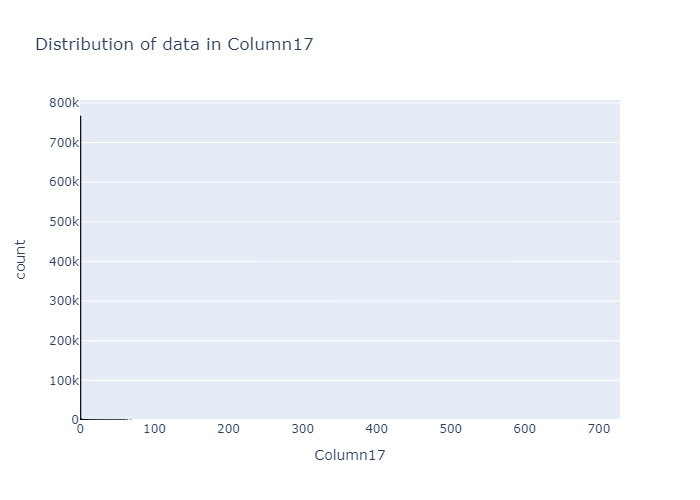

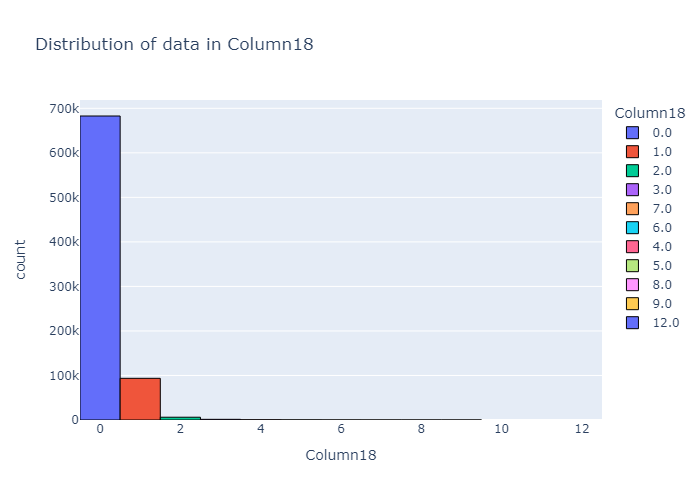

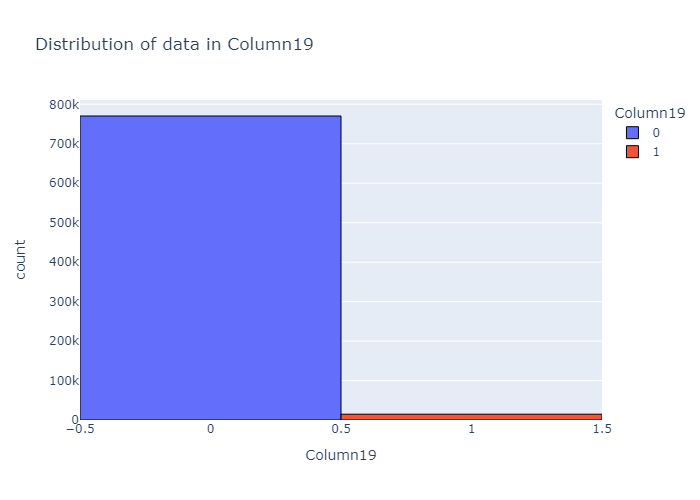

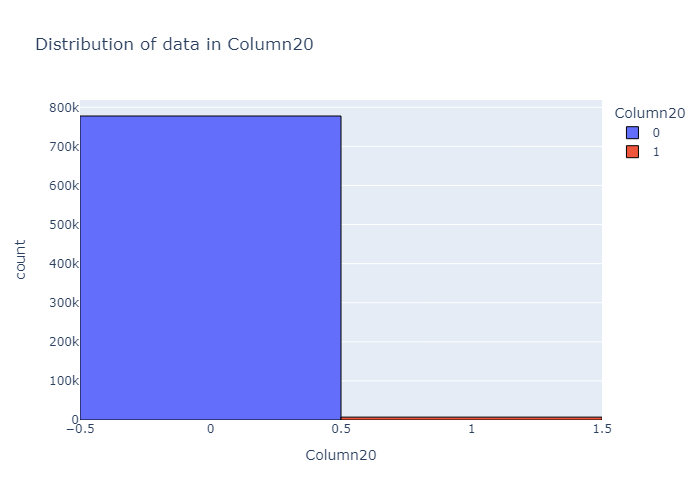

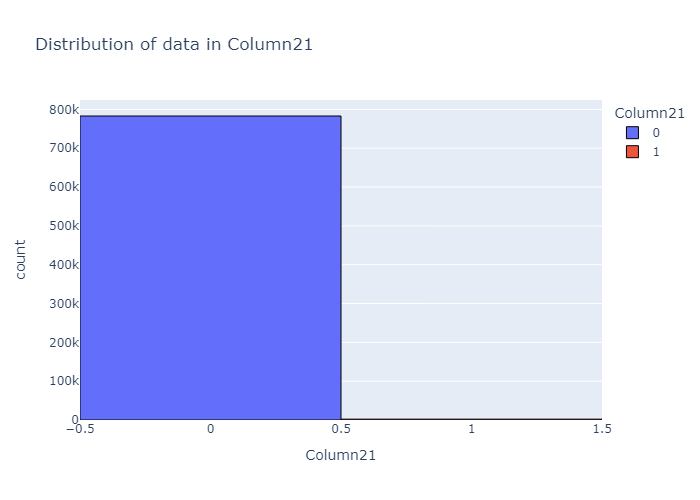

In [42]:
for col in xtrain.columns:
    if xtrain[col].nunique() < 50:
        fig = px.histogram(data_frame=xtrain,
                        x = xtrain[col],
                        color = xtrain[col],
                        title = f'Distribution of data in {col}')
        fig.update_traces(marker_line_color = 'black', marker_line_width = 1)
        fig.show()
    else:
        fig = px.histogram(data_frame=xtrain,
                        x = xtrain[col],
                        title = f'Distribution of data in {col}')
        fig.update_traces(marker_line_color = 'black', marker_line_width = 1)
        fig.show()

- There is a large class imbalance in the target dataset. We will use over sampling techniques like SMOTE and ADASYN to address this.
- There is also a lot of skew in the training features. We will use robust models to deal with this.

In [22]:
xtrain[num_cols].shape[1] + xtrain[cat_cols].shape[1] == xtrain.shape[1] # Checking to see if we captured all columns

True

### Imputing null values

In [67]:
x_train, x_val, y_train, y_val = train_test_split(xtrain, ytrain, test_size=0.2, random_state=seed) # Creating a validation set

In [69]:
x_val.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
373960,0.0,2408,2016.0,-1.577453,-1.429540,-0.007467,-0.263833,-0.015607,0.638813,NaN,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
444913,1.0,317,2395.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,NaN,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0
635847,0.0,292,431.0,0.678139,-1.003351,-0.007469,-0.407939,-0.015607,-0.774979,NaN,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0
696792,0.0,2495,2915.0,0.678139,0.701403,-0.007468,0.415255,-0.015601,0.358361,-0.078594,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
622339,0.0,837,7072.0,0.678139,0.701403,-0.007468,3.439919,-0.015607,0.147261,NaN,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0


In [70]:
y_val.head()

,target
373960,0
444913,0
635847,0
696792,0
622339,0


In [92]:
rf_auc = []
rf_imp_neighbors = []

In [182]:
model_random_forest = RandomForestClassifier(random_state=seed, n_jobs = -1) # Vanilla model for optimization purposes

def objective(trial):
    
    params_imp = {
        'n_nearest_features': trial.suggest_int('n_nearest_features', 1, 1000, log = True),
        'tol': trial.suggest_float('tol', 1e-3, 1, log = True)
    }
    
    imp_optuna = IterativeImputer(**params_imp, add_indicator=True, random_state = seed).set_output(transform='pandas')
    
    x_train_imp = imp_optuna.fit_transform(x_train)
    x_val_imp = imp_optuna.transform(x_val)

    y_train_ravel = np.ravel(y_train)
    y_val_ravel = np.ravel(y_val)
    
    model_random_forest.fit(x_train_imp, y_train_ravel)
    model_pred = model_random_forest.predict_proba(x_val_imp)[:, 1]

    # fpr, tpr, thresholds = metrics.roc_curve(y_val_ravel, model_pred)
    # auc = metrics.auc(fpr, tpr)

    auc = metrics.roc_auc_score(y_val_ravel, model_pred)

    rf_auc.append(auc)
    rf_imp_neighbors.append(params_imp['n_nearest_features'])

    return auc

sampler = optuna.samplers.TPESampler(seed = seed) # Seed to ensure reproducibility
study = optuna.create_study(direction = 'maximize', sampler = sampler)
study.optimize(objective,
               n_trials = 2,
               n_jobs = -1,
               show_progress_bar = True)

  0%|          | 0/2 [00:00<?, ?it/s]

[W 2024-09-04 22:39:34,109] Trial 0 failed with parameters: {'n_nearest_features': 34, 'tol': 0.006691173686114068} because of the following error: TypeError("'int' object is not subscriptable").
Traceback (most recent call last):
  File "c:\Users\saran\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\saran\AppData\Local\Temp\ipykernel_14852\1551506210.py", line 18, in objective
    model_random_forest.fit(x_train_imp, y_train_ravel)
  File "c:\Users\saran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\saran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 541, in fit
    self.n_classes_ = self.n_classes_[0]
                      ~~~~

In [185]:
study.best_value

0.9935939762221416

In [24]:
imp = IterativeImputer(n_nearest_features=10, add_indicator=True, random_state=0).set_output(transform = 'pandas')
xtrain_imp = imp.fit_transform(xtrain)
xtest_imp = imp.fit_transform(xtest.drop(columns=['ID']))

model = LogisticRegression()
model.fit(xtrain_imp, ytrain['target'])
ypred = model.predict(xtest_imp)

print(metrics.classification_report(ytest['target'], ypred))

c:\Users\saran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.99      0.98      0.98    237034
           1       0.80      0.89      0.84     24678

    accuracy                           0.97    261712
   macro avg       0.89      0.94      0.91    261712
weighted avg       0.97      0.97      0.97    261712



In [25]:
rep = metrics.classification_report(ytest['target'], ypred)
recall = metrics.recall_score(ytest['target'], ypred)
f1 = metrics.f1_score(ytest['target'], ypred)
fpr, tpr, thresholds = metrics.roc_curve(ytest['target'], ypred)
roc_auc = metrics.auc(fpr, tpr)

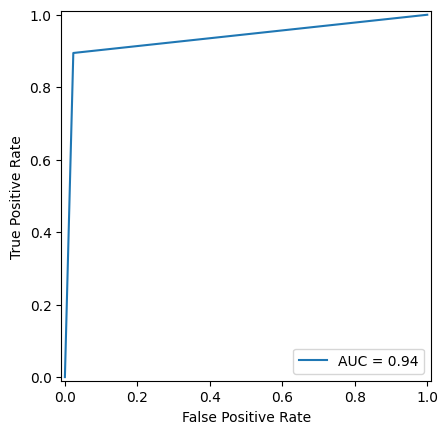

In [26]:
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
display.plot()

In [27]:
smote = SMOTE(random_state = 0, k_neighbors=5, n_jobs = -1)

xres, yres = smote.fit_resample(xtrain_imp, ytrain['target'])

c:\Users\saran\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning:

The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.



In [28]:
model = LogisticRegression()
model.fit(xres, yres)
ypred = model.predict(xtest_imp)

print(metrics.classification_report(ytest['target'], ypred))


c:\Users\saran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       1.00      0.96      0.98    237034
           1       0.73      1.00      0.84     24678

    accuracy                           0.96    261712
   macro avg       0.86      0.98      0.91    261712
weighted avg       0.97      0.96      0.97    261712



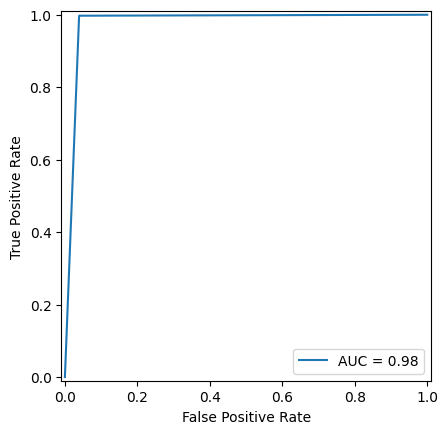

In [29]:
rep = metrics.classification_report(ytest['target'], ypred)
recall = metrics.recall_score(ytest['target'], ypred)
f1 = metrics.f1_score(ytest['target'], ypred)
fpr, tpr, thresholds = metrics.roc_curve(ytest['target'], ypred)
roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
display.plot()

In [150]:
print(f"x_train_imp shape: {x_train_imp_TEMP.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val_imp shape: {x_val_imp_TEMP.shape}")
print(f"y_val shape: {y_val.shape}")

x_train_imp shape: (628106, 31)
y_train shape: (628106, 1)
x_val_imp shape: (157027, 31)
y_val shape: (157027, 1)


In [153]:
np.ravel(y_train).shape

(628106,)